# Overlapping Celltype annotation with GNN
Droplet based single cell transcriptomics has recently enabled parallel screening of tens of thousands of single cells. Clustering methods that scale for such high dimensional data without compromising accuracy are scarce.

This tutorial focuses on how to cluster the cell with overlapping and identify the cell with multi-fate

Colab_Reproducibility：https://colab.research.google.com/drive/1l7iHdVmTQcv9YmpIjhK_UzLuHbJ1Jv9E?usp=sharing

<div class="admonition warning">
  <p class="admonition-title">Warning</p>
  <p>
    NOCD's development is still in progress. The current version may not fully reproduce the original implementation’s results.
  </p>
</div>

## Part.1 Data preprocess

In this part, we perform preliminary processing of the data, such as normalization and logarithmization, in order to make the data more interpretable

In [1]:
import omicverse as ov
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
#param for visualization
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
from matplotlib.colors import LinearSegmentedColormap
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017', '#9F987F','#E0DFED',
 '#EF7B77', '#279AD7','#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10',
 '#EAEFC5', '#01A0A7', '#75C8CC', '#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812', '#9DC3C3', '#A89C92', '#FEE00C', '#FEF2A1']
sc_color_cmap = LinearSegmentedColormap.from_list('Custom', sc_color, len(sc_color))

In [4]:
adata = anndata.read('sample/rna.h5ad')
adata

AnnData object with n_obs × n_vars = 22679 × 25596
    obs: 'Type'

In [5]:
adata=ov.single.scanpy_lazy(adata)

filtered out 1234 cells that have less than 200 genes expressed
filtered out 4074 genes that are detected in less than 3 cells


/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:15)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


## Part.2 Overlapping Community Detection
In this part, we perform a graph neural network (GNN) basedmodel for overlapping community detection in scRNA-seq.

![https://www.cs.cit.tum.de/fileadmin/w00cfj/daml/nocd/nocd.png](https://www.cs.cit.tum.de/fileadmin/w00cfj/daml/nocd/nocd.png)

torch have been install version: 1.11.0
Epoch    0, loss.full = 0.7991, nmi = 0.01
Epoch   25, loss.full = 0.3902, nmi = 0.12
Epoch   50, loss.full = 0.3280, nmi = 0.14
Epoch   75, loss.full = 0.3001, nmi = 0.22
Epoch  100, loss.full = 0.2879, nmi = 0.24
Epoch  125, loss.full = 0.2818, nmi = 0.22
Epoch  150, loss.full = 0.2767, nmi = 0.21
Epoch  175, loss.full = 0.2735, nmi = 0.22
Epoch  200, loss.full = 0.2715, nmi = 0.20
Epoch  225, loss.full = 0.2710, nmi = 0.23
Epoch  250, loss.full = 0.2704, nmi = 0.22
Epoch  275, loss.full = 0.2711, nmi = 0.21
Epoch  300, loss.full = 0.2706, nmi = 0.22
Epoch  325, loss.full = 0.2701, nmi = 0.23
Epoch  350, loss.full = 0.2691, nmi = 0.23
Epoch  375, loss.full = 0.2697, nmi = 0.23
Epoch  400, loss.full = 0.2702, nmi = 0.23
Epoch  425, loss.full = 0.2693, nmi = 0.22
Epoch  450, loss.full = 0.2696, nmi = 0.22
Epoch  475, loss.full = 0.2688, nmi = 0.23
Epoch  500, loss.full = 0.2694, nmi = 0.24
Final nmi = 0.228
......add nocd result to adata.obs


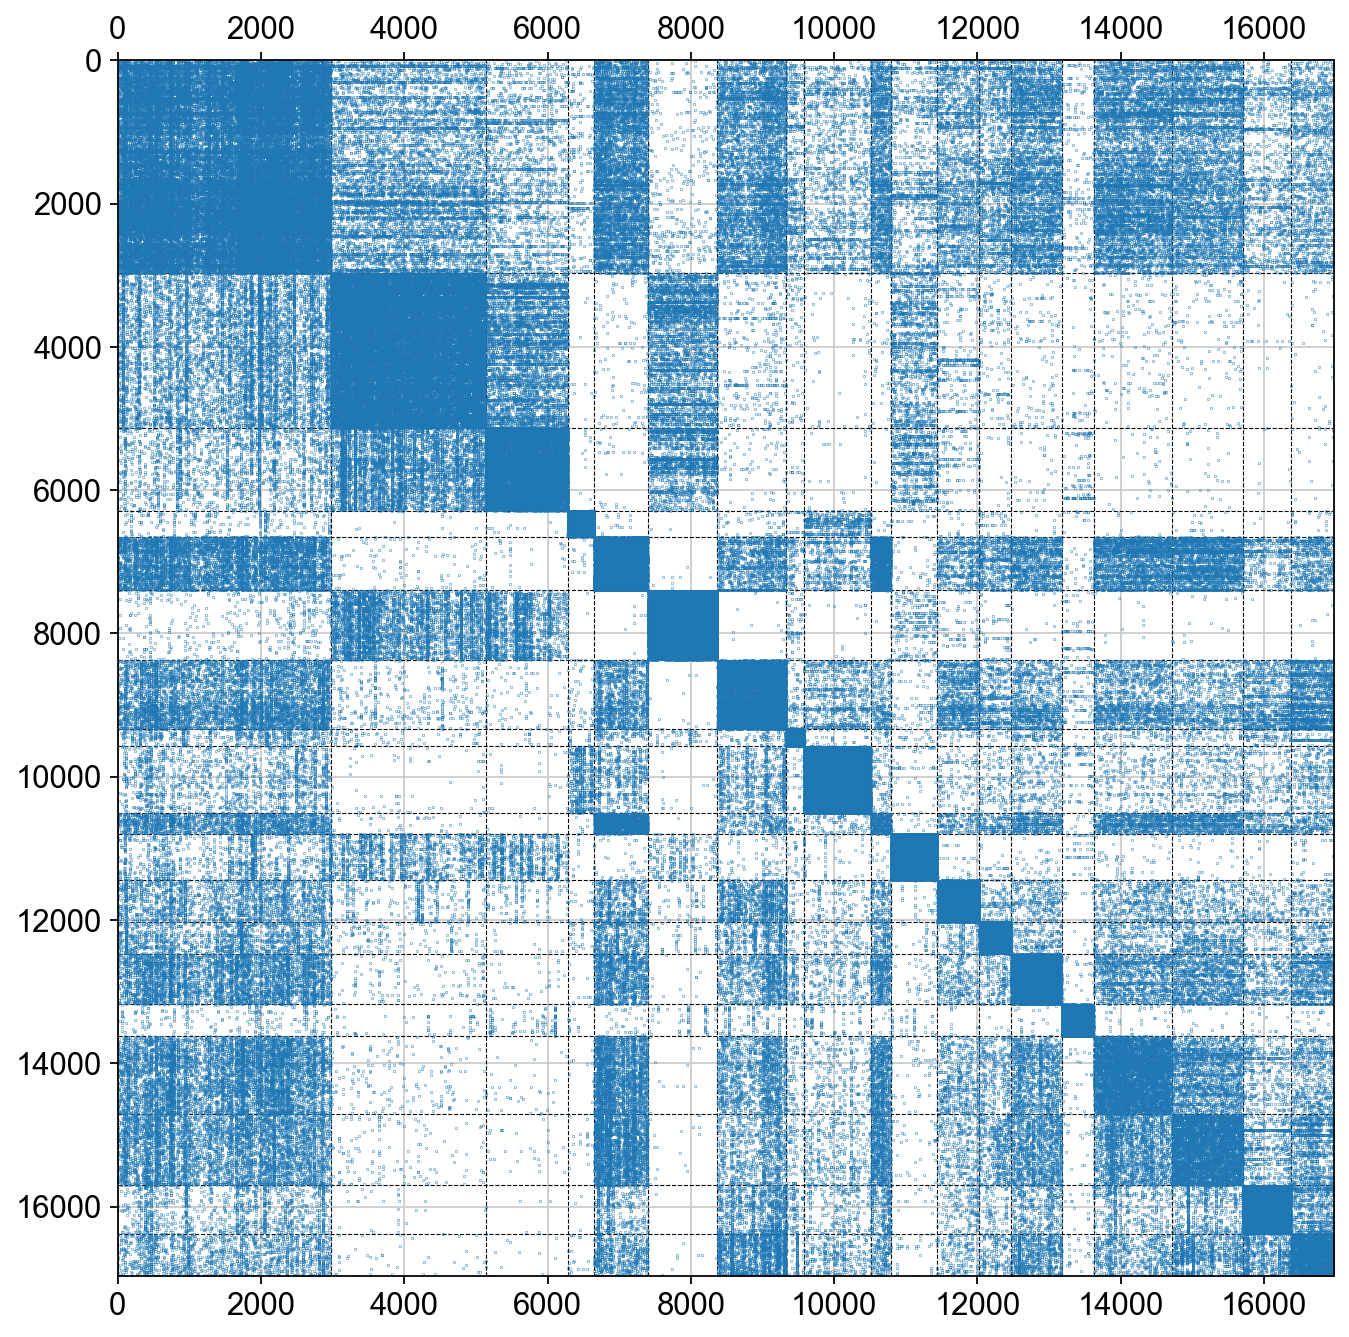

In [6]:
scbrca=ov.single.scnocd(adata)
scbrca.matrix_transform()
scbrca.matrix_normalize()
scbrca.GNN_configure()
scbrca.GNN_preprocess()
scbrca.GNN_model()
scbrca.GNN_result()
scbrca.GNN_plot()
#scbrca.calculate_nocd()
scbrca.cal_nocd()

In [8]:
scbrca.calculate_nocd()

......add nocd result to adata.obs


## Part.3 Visualization
In this part, we visualized the overlapping and non-overlapping cell.

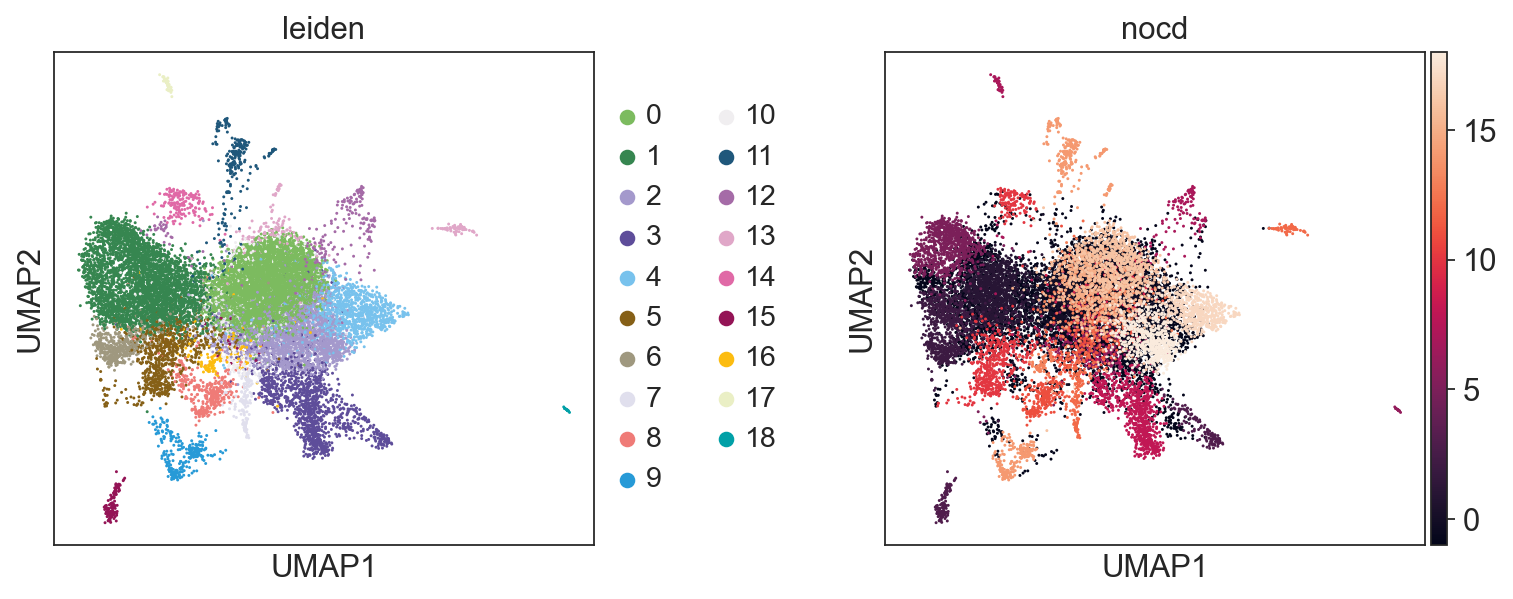

In [9]:
sc.pl.umap(scbrca.adata, color=['leiden','nocd'],wspace=0.4,palette=sc_color)

zero means the cell related to overlap

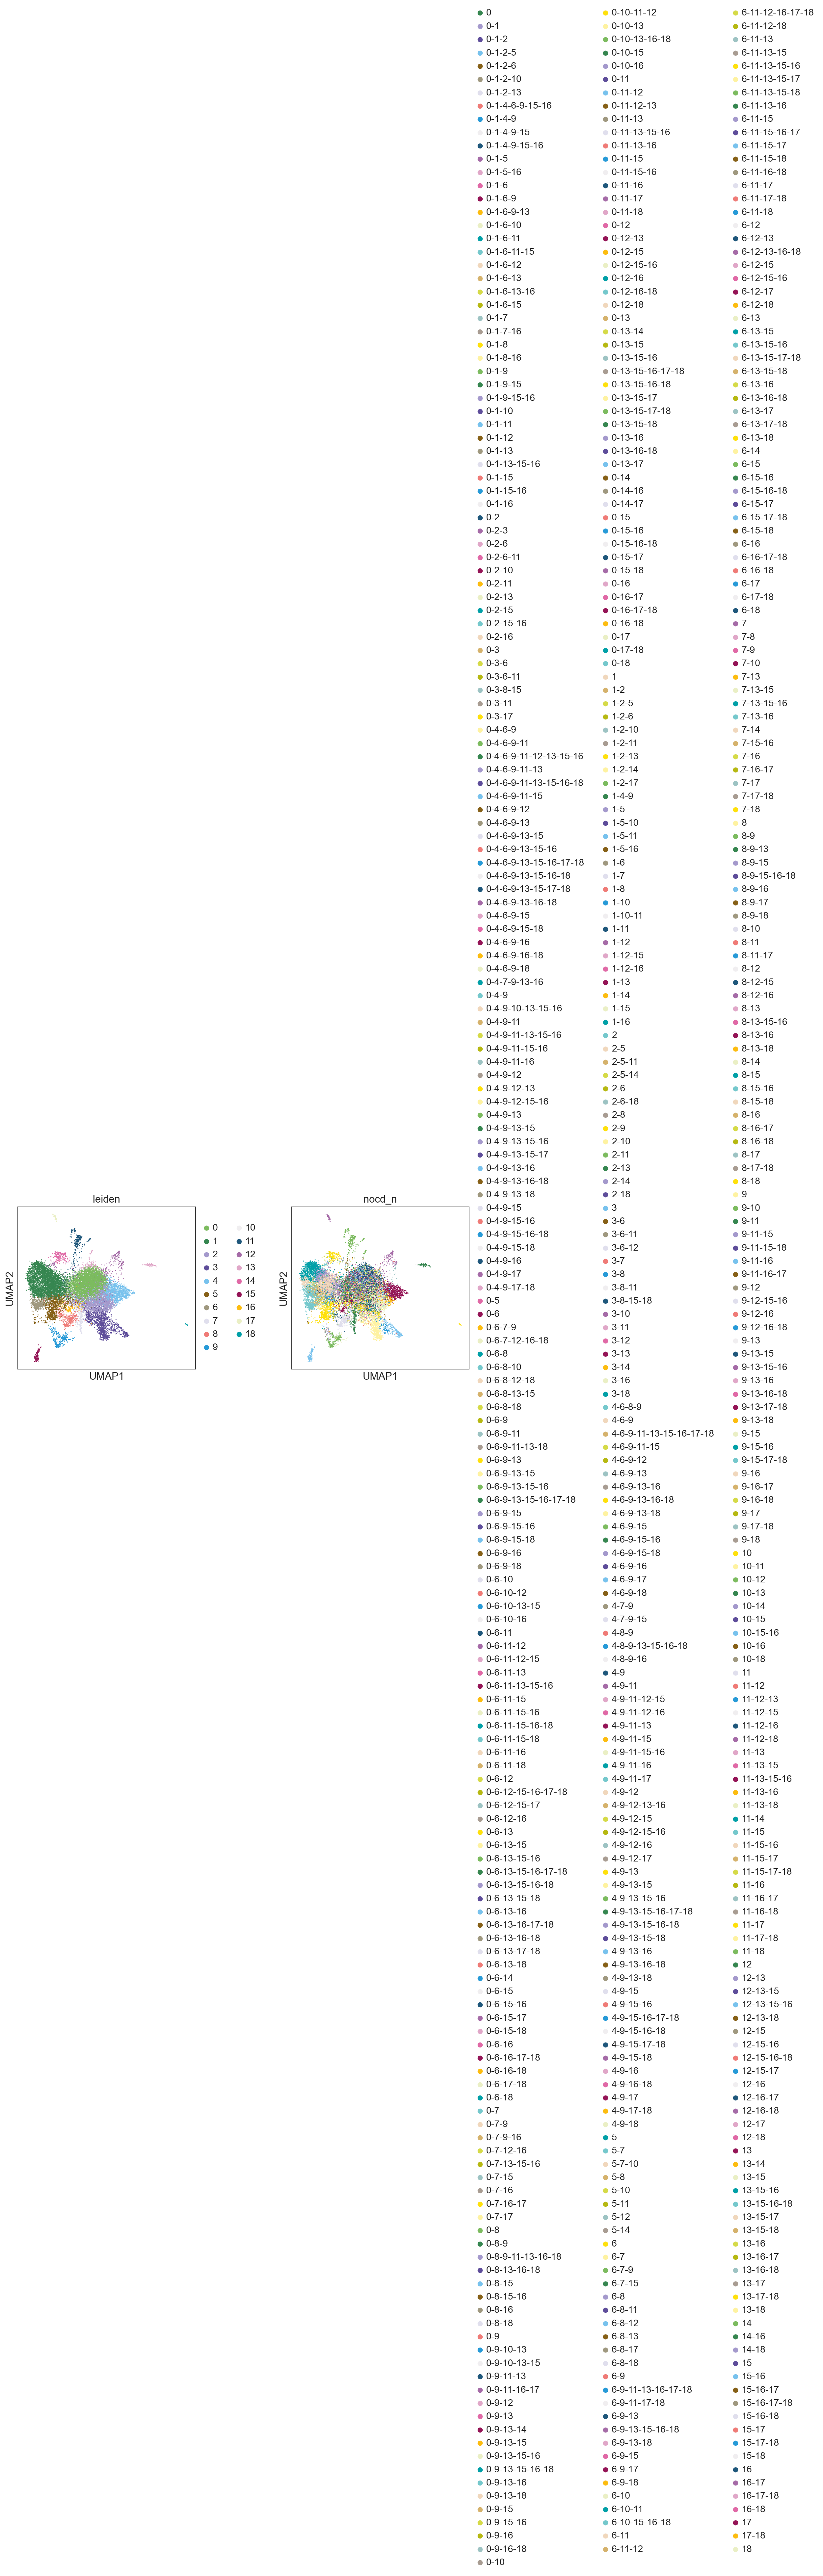

In [10]:
sc.pl.umap(scbrca.adata, color=['leiden','nocd_n'],wspace=0.4,palette=sc_color)
